In [12]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Single Assay

Count of >0.8
mfp: 586.0
fcfp: 592.0
maccs: 554.0
apfp: 625.0
ttfp: 624.0
gesim: 623.0
gesim_au: 572.0
gesim_r3: 616.0


/tmp/ipykernel_3265908/1720680043.py:34: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df_vis, x='bins', y="count", hue='method', ax=ax, errorbar='sd', errwidth=1,
/tmp/ipykernel_3265908/1720680043.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
/tmp/ipykernel_3265908/1720680043.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


Text(0, 0.5, 'Count')

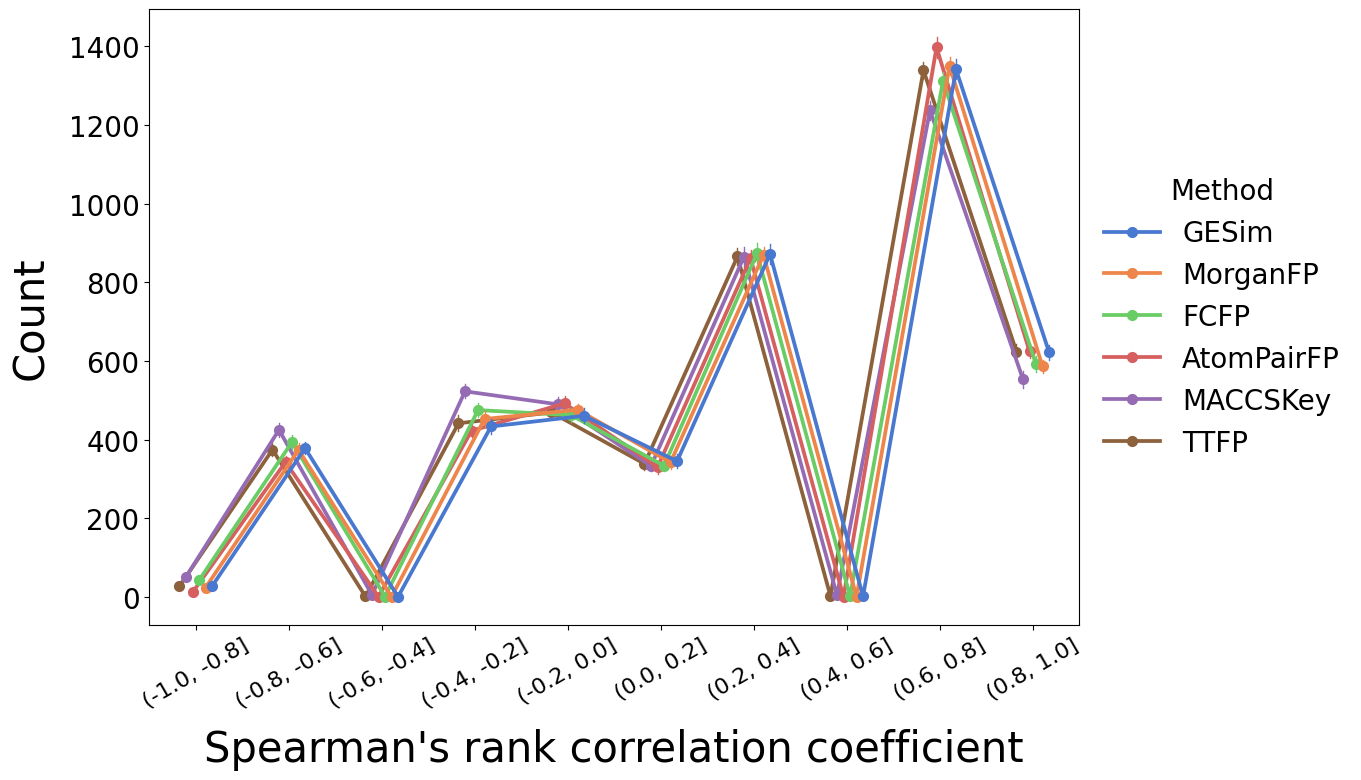

In [22]:
with open('result_single.pkl', 'rb') as f:
    result_dict = pickle.load(f)

print("Count of >0.8")
for k in result_dict.keys():
    df = pd.DataFrame(result_dict[k])
    corr_cnt = (df > 0.8).sum(axis=1).mean()
    print(f"{k}: {round(corr_cnt, 0)}")
    
    

bins = [round(i, 2) for i in np.linspace(-1, 1, 11)]
concat_list = []

method_list = ['ttfp', 'maccs', 'apfp', 'fcfp', 'mfp', 'gesim']  # To unify the colors of LBVS and SS benchmarks
rename_dict = {
    "ttfp": "TTFP",
    "maccs": "MACCSKey",
    "apfp": "AtomPairFP",
    "fcfp": "FCFP",
    "mfp": "MorganFP",
    "gesim": "GESim",
}
for method_name in method_list:
#for method_name in result_dict.keys():
    for i in range(len(result_dict[method_name])):
        bin_count_df = pd.cut(result_dict[method_name][i], bins=bins).value_counts().rename_axis('bins').reset_index()
        bin_count_df['method'] = [rename_dict[method_name] for _ in range(bin_count_df.shape[0])]
        concat_list.append(bin_count_df)
df_vis = pd.concat(concat_list)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
sns.pointplot(data=df_vis, x='bins', y="count", hue='method', ax=ax, errorbar='sd', errwidth=1,
              palette=sns.color_palette("muted")[:6][::-1], dodge=0.35, markersize=6)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Method", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20, title_fontsize=20, frameon=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
ax.set_xlabel("Spearman's rank correlation coefficient", fontsize=30, labelpad=12)
ax.set_ylabel("Count", fontsize=30, labelpad=12)

# Multi Assay

Count of >0.8
mfp: 1064.0
fcfp: 1027.0
maccs: 908.0
apfp: 974.0
ttfp: 1052.0
gesim: 1016.0
gesim_au: 825.0
gesim_r3: 1046.0


/tmp/ipykernel_3265908/3803103284.py:34: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df_vis, x='bins', y="count", hue='method', ax=ax, errorbar='sd', errwidth=1,
/tmp/ipykernel_3265908/3803103284.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
/tmp/ipykernel_3265908/3803103284.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


Text(0, 0.5, 'Count')

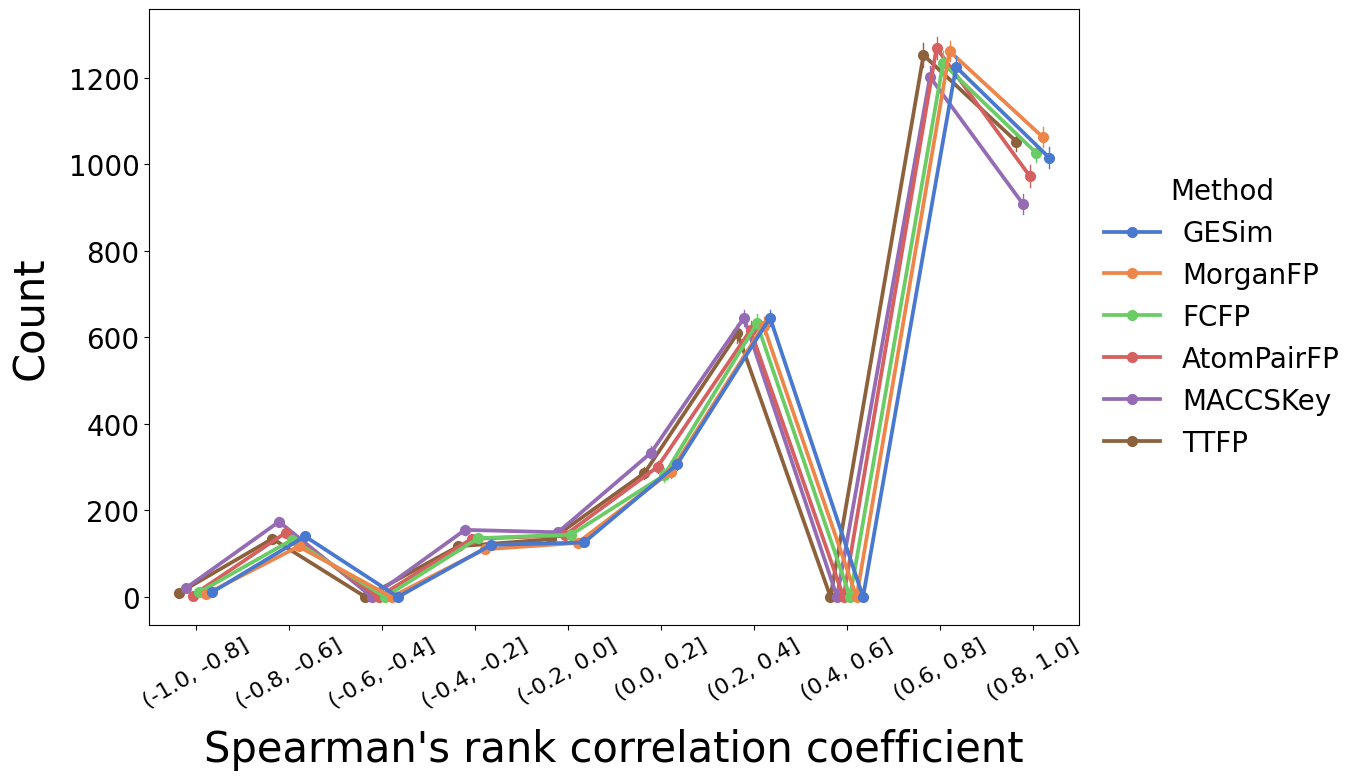

In [21]:
with open('./result_multi.pkl', 'rb') as f:
    result_dict = pickle.load(f)

print("Count of >0.8")
for k in result_dict.keys():
    df = pd.DataFrame(result_dict[k])
    corr_cnt = (df > 0.8).sum(axis=1).mean()
    print(f"{k}: {round(corr_cnt, 0)}")
    
    

bins = [round(i, 2) for i in np.linspace(-1, 1, 11)]
concat_list = []

method_list = ['ttfp', 'maccs', 'apfp', 'fcfp', 'mfp', 'gesim']  # To unify the colors of LBVS and SS benchmarks
rename_dict = {
    "ttfp": "TTFP",
    "maccs": "MACCSKey",
    "apfp": "AtomPairFP",
    "fcfp": "FCFP",
    "mfp": "MorganFP",
    "gesim": "GESim",
}
for method_name in method_list:
#for method_name in result_dict.keys():
    for i in range(len(result_dict[method_name])):
        bin_count_df = pd.cut(result_dict[method_name][i], bins=bins).value_counts().rename_axis('bins').reset_index()
        bin_count_df['method'] = [rename_dict[method_name] for _ in range(bin_count_df.shape[0])]
        concat_list.append(bin_count_df)
df_vis = pd.concat(concat_list)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
sns.pointplot(data=df_vis, x='bins', y="count", hue='method', ax=ax, errorbar='sd', errwidth=1,
              palette=sns.color_palette("muted")[:6][::-1], dodge=0.35, markersize=6)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Method", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20, title_fontsize=20, frameon=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
ax.set_xlabel("Spearman's rank correlation coefficient", fontsize=30, labelpad=12)
ax.set_ylabel("Count", fontsize=30, labelpad=12)